In [1]:
%matplotlib widget

In [2]:
from matplotlib.pyplot import subplots
import pyFAI
from pyFAI.gui import jupyter
import h5py, fabio, numpy, glob, os

In [3]:
ponis = [i for i in glob.glob("**/*.poni", recursive=True) if i.endswith("01.poni")]

In [4]:
ponis

['Eiger_Si450/CeO2_transmission/CeO2_transmission_0001/scan0002/Frame_01.poni',
 'Eiger_Si450/CeO2_transmission/CeO2_transmission_Si_transmission_4MSi/scan0009/Frame01.poni',
 'Eiger_Si450/CeO2_transmission/Si_transmission_4MSi/scan0009/Frame01.poni',
 'Eiger_Si450/Si_transmission/scan0009/Frame01.poni',
 'Eiger_CdTe750/ceo2_transmission_4MCdTe_25keV/ceo2_transmission_4MCdTe_25keV_0001/scan0002/Frame_01.poni',
 'Eiger_CdTe750/Si_capillary_4MCdTe_25keV/Si_capillary_4MCdTe_25keV_0001/scan0002/Frame_01.poni']

In [5]:
ais = {"Si:Si": pyFAI.load('Eiger_Si450/Si_transmission/scan0009/Frame01.poni'),
       "CdTe:Si":pyFAI.load('Eiger_CdTe750/Si_capillary_4MCdTe_25keV/Si_capillary_4MCdTe_25keV_0001/scan0002/Frame_01.poni'),
       "Si:CeO2": pyFAI.load('Eiger_Si450/CeO2_transmission/CeO2_transmission_0001/scan0002/Frame_01.poni'),
       "CdTe:CeO2":pyFAI.load('Eiger_CdTe750/ceo2_transmission_4MCdTe_25keV/ceo2_transmission_4MCdTe_25keV_0001/scan0002/Frame_01.poni'),
}
images = {"Si:Si":fabio.open(glob.glob('Eiger_Si450/Si_transmission/scan0009/*.h5')[0]).get_frame(1).data,
         "CdTe:Si":fabio.open(glob.glob('Eiger_CdTe750/Si_capillary_4MCdTe_25keV/Si_capillary_4MCdTe_25keV_0001/scan0002/*.h5')[0]).get_frame(1).data,
         "Si:CeO2":fabio.open(glob.glob('Eiger_Si450/CeO2_transmission/CeO2_transmission_0001/scan0002/*.h5')[0]).get_frame(1).data,
         "CdTe:CeO2":fabio.open(glob.glob('Eiger_CdTe750/ceo2_transmission_4MCdTe_25keV/ceo2_transmission_4MCdTe_25keV_0001/scan0002/*.h5')[0]).get_frame(1).data,
         }


In [6]:
results = {}
for key in ais.keys():
    results[key] = ais[key].integrate1d(images[key], 4000, method=("full", "histogram","cython"), unit="2th_deg")

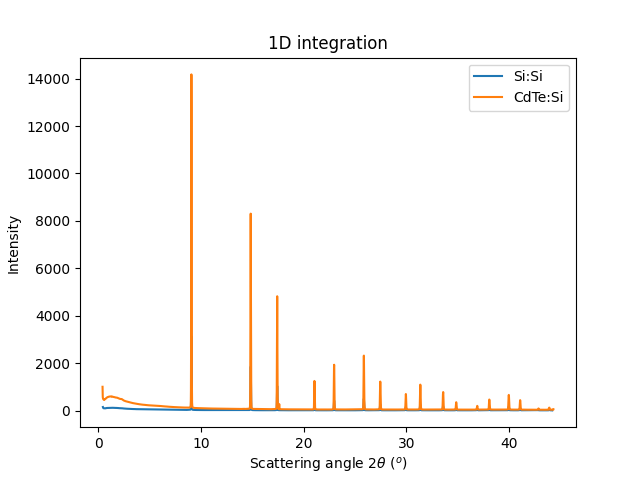

In [7]:
ax = jupyter.plot1d(results["Si:Si"], label="Si:Si")
jupyter.plot1d(results["CdTe:Si"], label="CdTe:Si", ax=ax)
ax.legend()

In [8]:
ais["Si:Si"].getFit2D().centerX

1405.5075592213118

Text(0.5, 1.0, 'Comparison of sensors for Si (SRM640) powder diffraction')

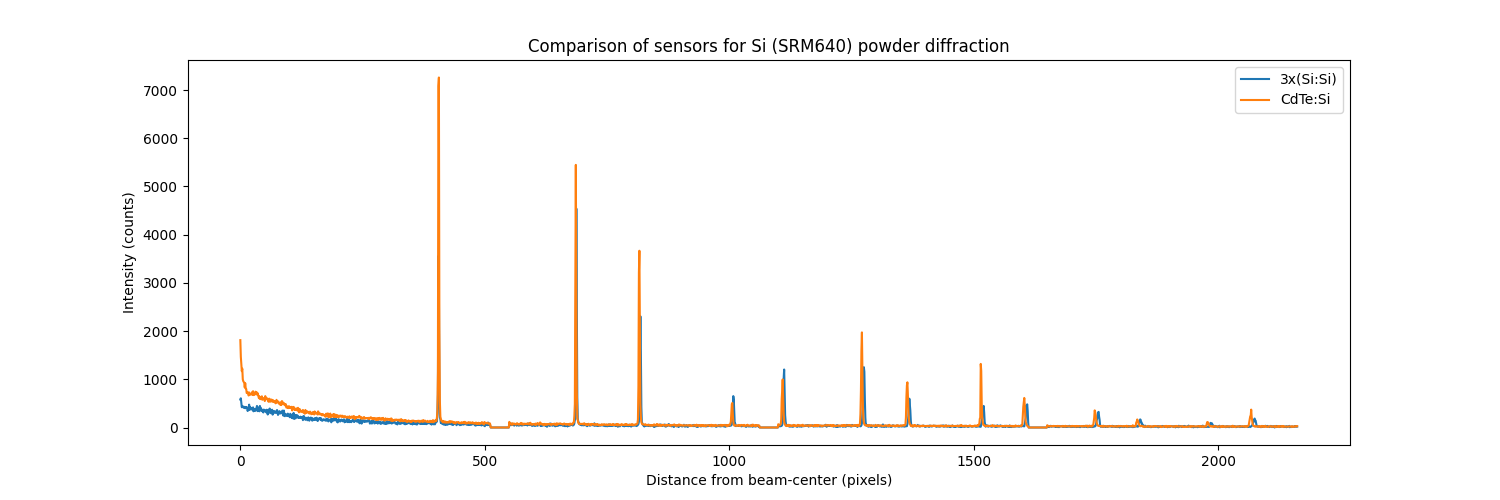

In [9]:
fig,ax = subplots(figsize=(15,5))
for key in ("Si:Si","CdTe:Si"):
    center = ais[key].getFit2D()
    signal = images[key][int(round(center.centerY))::-1,int(round(center.centerX))] 
    label = key
    if key.startswith("Si"):
        signal = signal*3
        label = f"3x({key})"
    ax.plot(signal, label=label)
# ax.semilogy()
ax.legend()
ax.set_ylabel("Intensity (counts)")
ax.set_xlabel("Distance from beam-center (pixels)")
ax.set_title("Comparison of sensors for Si (SRM640) powder diffraction")